In [1]:
import pyvista as pv
import numpy as np
from scipy.special import sph_harm
import matplotlib.pyplot as plt

from atomview.atom_wavefunction import get_wavefunction_prob_contour_mesh, get_wavefunction_volume_mesh, get_radial_part
from atomview.utils import complex_to_rgba

In [2]:
(n, l, m) = (1, 0, 0)

In [12]:
(n, l, m)

(8, 4, 0)

In [29]:
pv.set_jupyter_backend('static')

n = np.random.randint(1, 10)
l = np.random.randint(0, n)
m = np.random.randint(-l, l+1)

(n, l, m) = (3, 2, 0)

real = False
notebook = True

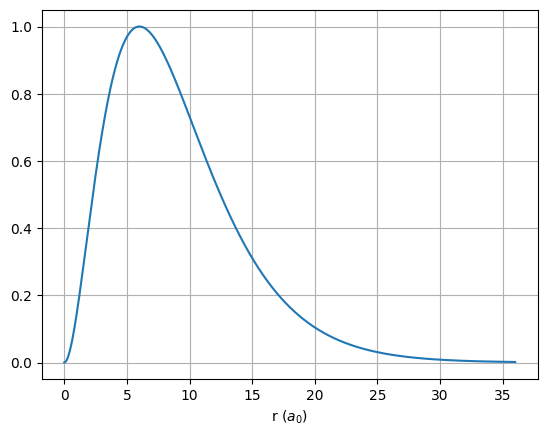

In [30]:
r = np.linspace(0, (2*n)**2, 1000)
R = get_radial_part(n, l, r)
R /= max(np.abs(R))
plt.plot(r, R, label=f'({n}, {l})')
plt.xlabel('r ($a_0$)')
plt.grid(True)
plt.show()

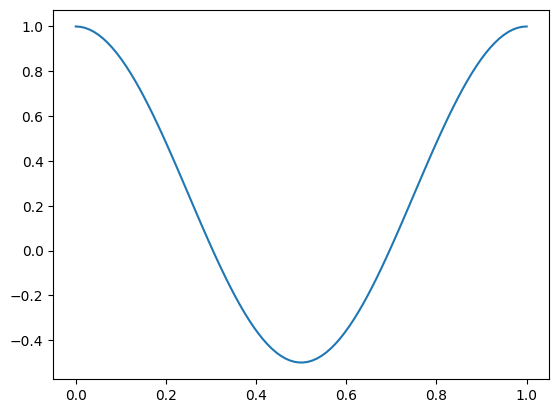

In [31]:
from scipy.special import lpmv

theta_1d = np.linspace(0, np.pi, 100)

legendre_part = lpmv(m, l, np.cos(theta_1d))
legendre_part /= max(np.abs(legendre_part))
plt.plot(theta_1d/np.pi, legendre_part)
plt.show()

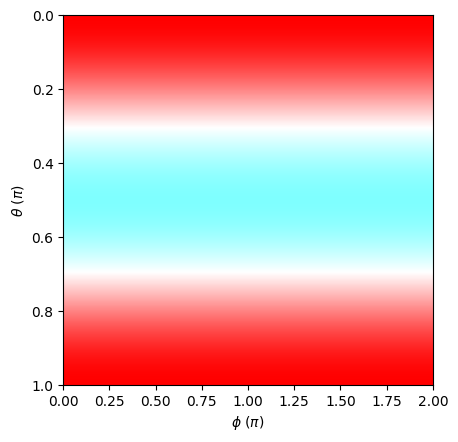

In [32]:
theta_1d = np.linspace(0, np.pi, 300)
phi_1d = np.linspace(0, 2 * np.pi, 300)

theta, phi = np.meshgrid(theta_1d, phi_1d, indexing='ij')
ylm = sph_harm(m, l, phi, theta)
if real:
    if m > 0:
        ylm = np.sqrt(2) * (-1)**m * np.real(ylm)
    elif m < 0:
        ylm = np.sqrt(2) * (-1)**m * np.imag(ylm)   
        
color_map = complex_to_rgba(ylm, mag_maps_to='s')

plt.imshow(color_map, extent=[0, 2, 1, 0], aspect=2)
plt.xlabel('$\phi$ ($\pi$)')
plt.ylabel('$\\theta$ ($\pi$)')

plt.show()

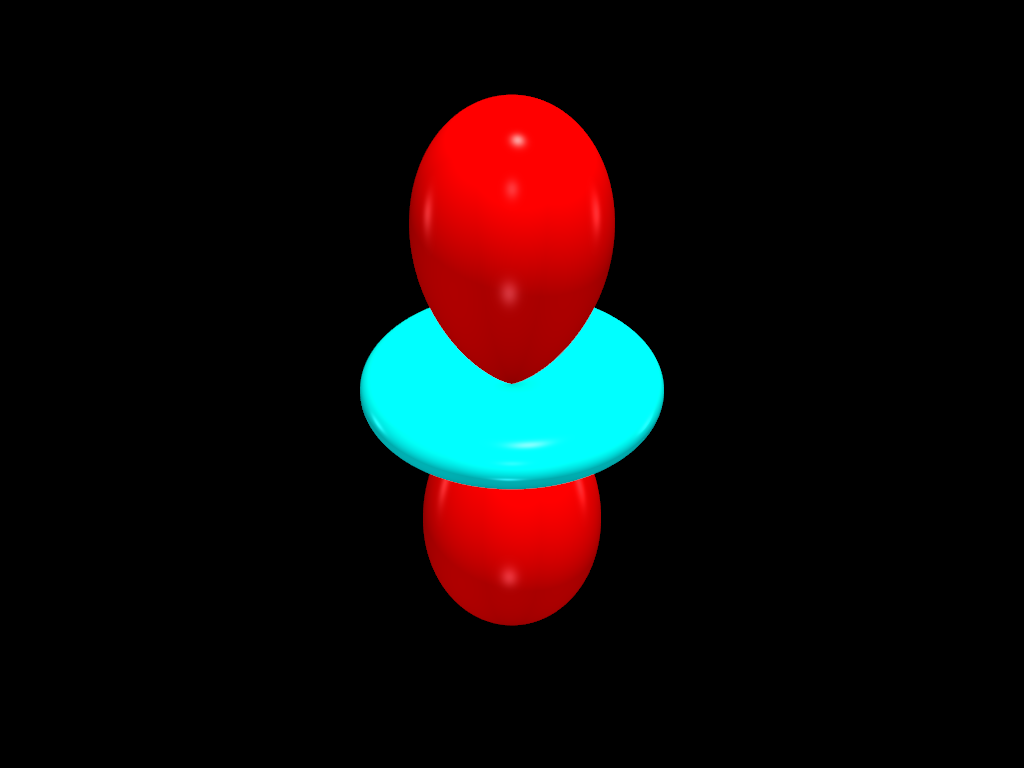

In [33]:
r = np.abs(ylm)

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

color_map = complex_to_rgba(ylm, mag_maps_to='')

mesh = pv.StructuredGrid(x, y, z)
mesh['rgba'] = color_map.reshape((ylm.size, 4), order='F')

pl = pv.Plotter(notebook=notebook)
pl.set_background('black')
pl.add_mesh(
    mesh, 
    scalars='rgba', 
    rgb=True,    
    specular=1,
    smooth_shading=True,
    diffuse=1,
    ambient=0.3)
pl.show()


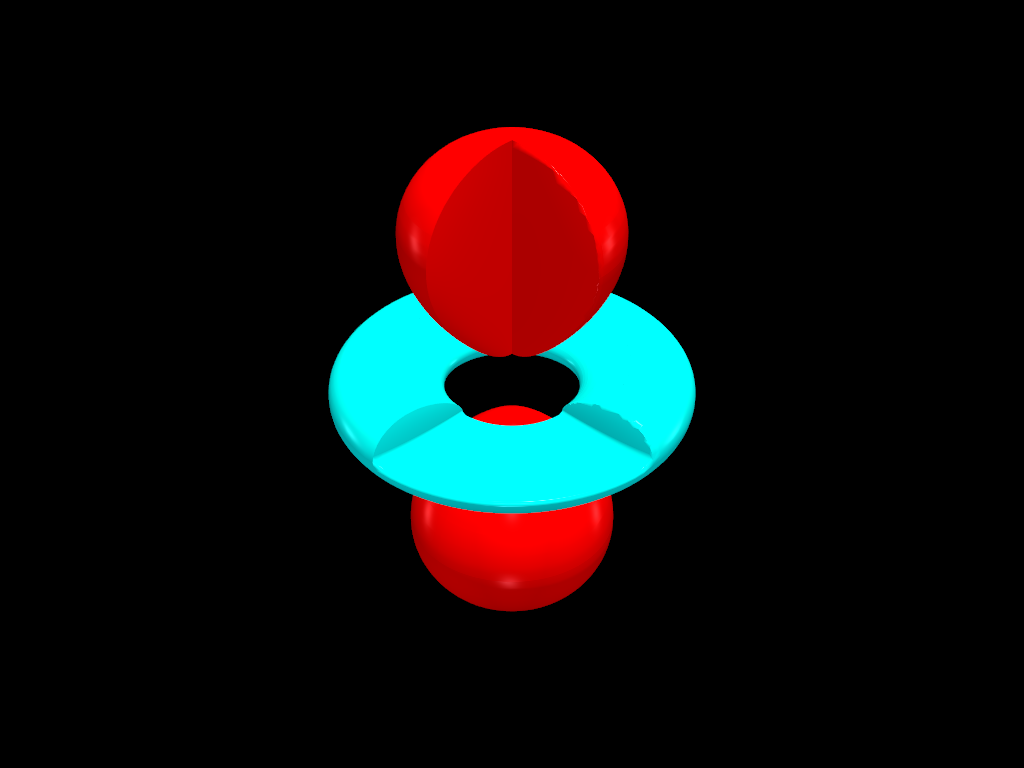

In [34]:
contour_mesh = get_wavefunction_prob_contour_mesh(
    n, l, m, real=real, num_pts=100,
    prob_threshold_list=(0.5,),
    mag_maps_to='',
    clip=True)

pl = pv.Plotter(notebook='static')
pl.set_background('black')
pl.add_mesh(
    contour_mesh,
    scalars='rgba',
    smooth_shading=True,
    rgb=True,
    specular=1,
    diffuse=1,
    ambient=0.3)
pl.show()

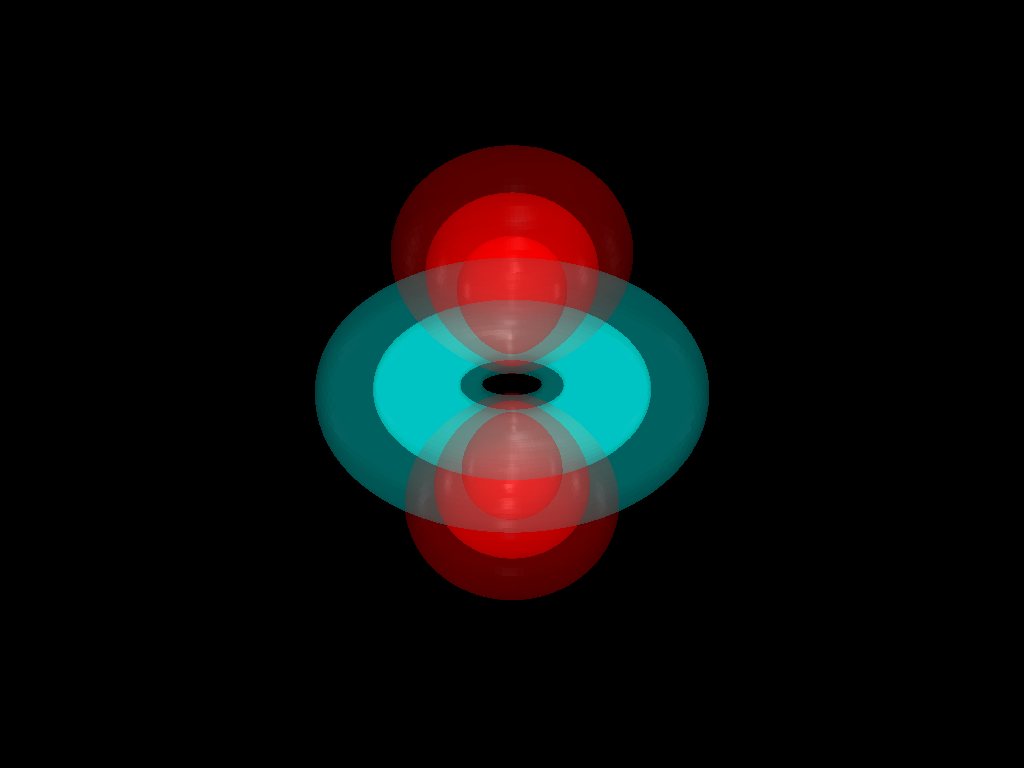

In [35]:
contour_mesh = get_wavefunction_prob_contour_mesh(
    n, l, m, real=real, num_pts=100,
    prob_threshold_list=(0.2, 0.5, 0.8),
    mag_maps_to='a',
    clip=False)

pl = pv.Plotter(notebook=notebook)
pl.set_background('black')
pl.add_mesh(
    contour_mesh,
    scalars='rgba',
    rgb=True,
    specular=1,
    diffuse=1,
    ambient=0.3)
pl.show()

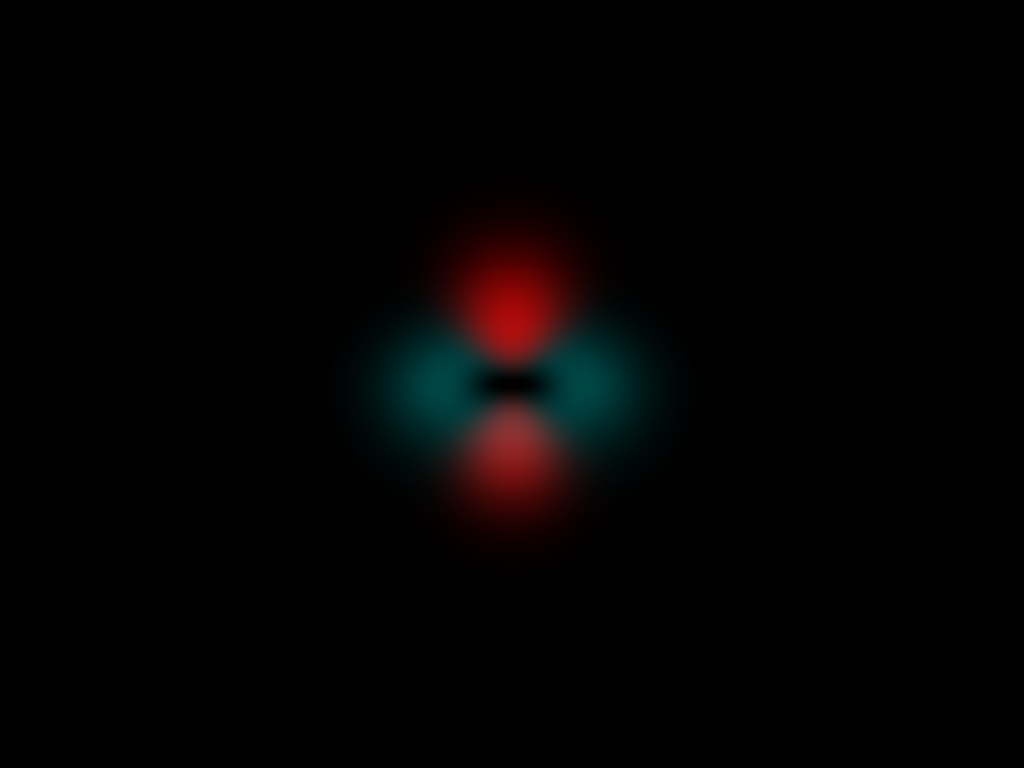

In [36]:
volume_mesh = get_wavefunction_volume_mesh(
    n, l, m, real=real, num_pts=100, max_opacity=0.4, clip=False
)

pl = pv.Plotter(notebook=notebook)
pl.set_background('black')
pl.add_volume(
    volume_mesh,
    scalars='rgba',
    mapper='gpu'
)
pl.show()